In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [2]:
df=pd.read_csv("DS3_C6_S1_Regression_StoreSales_Data_Project.csv")

In [3]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [4]:
df2=df.dropna(axis=0)

In [5]:
df2.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [6]:
df2.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
obj=[]
for i in df2.select_dtypes("object"):
    obj.append(i)

In [8]:
for i in obj:
    df2[i]=df2[i].astype("category")
    

In [9]:
df2.dtypes

Item_Identifier              category
Item_Weight                   float64
Item_Fat_Content             category
Item_Visibility               float64
Item_Type                    category
Item_MRP                      float64
Outlet_Identifier            category
Outlet_Establishment_Year       int64
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
Item_Outlet_Sales             float64
dtype: object

In [10]:
cat=[]
for i in df2.select_dtypes("category"):
    cat.append(i)
for i in cat:
    df2[i]=df2[i].cat.codes
    

In [11]:
df2.dtypes

Item_Identifier                int16
Item_Weight                  float64
Item_Fat_Content                int8
Item_Visibility              float64
Item_Type                       int8
Item_MRP                     float64
Outlet_Identifier               int8
Outlet_Establishment_Year      int64
Outlet_Size                     int8
Outlet_Location_Type            int8
Outlet_Type                     int8
Item_Outlet_Sales            float64
dtype: object

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
numerics = ['int64', 'float64']
df3 = df2.select_dtypes(include=numerics)
df_scaled=pd.DataFrame(MinMaxScaler().fit_transform(df3.to_numpy()),columns=df3.columns)
df_scaled

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,0.282525,0.038399,0.927507,0.583333,0.283587
1,0.081274,0.048346,0.072068,1.000000,0.031419
2,0.770765,0.040593,0.468288,0.583333,0.158115
3,0.871986,0.218055,0.640093,0.541667,0.053555
4,0.260494,0.186950,0.095805,0.083333,0.073651
...,...,...,...,...,...
8518,0.137541,0.163812,0.777729,0.083333,0.210293
8519,0.227746,0.133638,0.326263,0.708333,0.039529
8520,0.359929,0.097321,0.228492,0.791667,0.088850
8521,0.158083,0.436080,0.304939,1.000000,0.138835


 # EDA

In [14]:
df_copy=df

In [15]:
df_copy.dropna(inplace=True)

In [16]:
df_copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


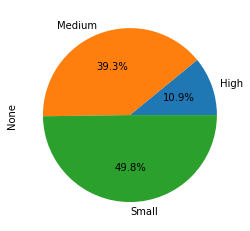

In [17]:
df_copy.groupby(df_copy['Outlet_Size']).size().plot(kind='pie',autopct='%0.1f%%')
plt.show()

## Small outlet are more then other outlet sizes in the data 

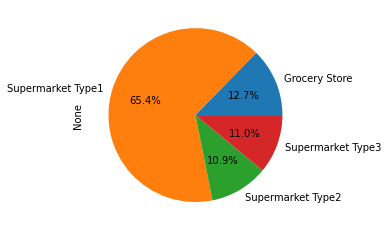

In [18]:
df_copy.groupby(df_copy["Outlet_Type"]).size().plot(kind='pie',autopct='%0.1f%%')
plt.show()

# supermarket Type 1 is having high number of sales 

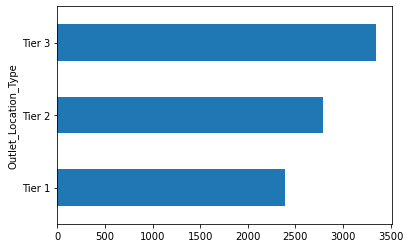

In [19]:
df_copy.groupby(df_copy["Outlet_Location_Type"]).size().plot(kind='barh')
plt.show()

# Tier 3 cities store are making high no. sales

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

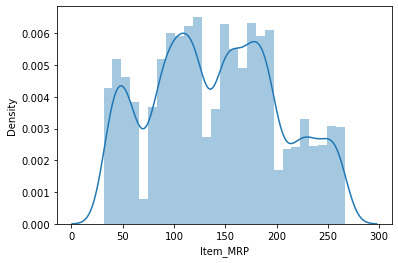

In [20]:
sns.distplot(df_copy["Item_MRP"])

# Items are in the range of 40 to 250 rs more sales aree from 100 rs range

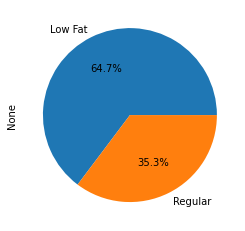

In [21]:
df_copy.groupby(df_copy['Item_Fat_Content']).size().plot(kind='pie',autopct='%0.1f%%')
plt.show()

# low fat items are most sold which is 64.7 % martket cap

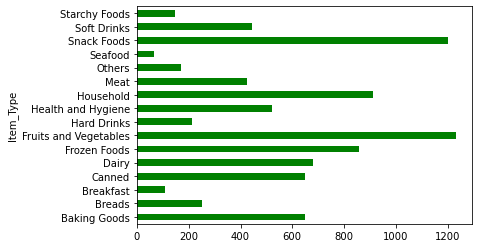

In [22]:
df_copy.sort_values("Item_Type",inplace=True)
df_copy.groupby(df_copy["Item_Type"]).size().plot(kind='barh',color="g")
plt.show()

 # more sales from fruits and Vegetables item_type

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

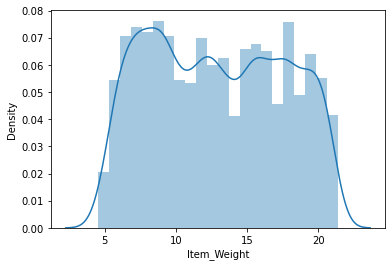

In [23]:
sns.distplot(df_copy["Item_Weight"])

 # item_weights are in the range of 4 to 22 

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

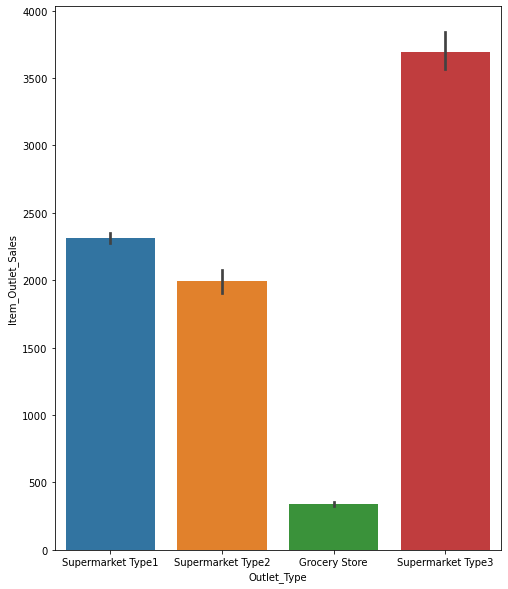

In [24]:
plt.figure(figsize=(8,10))
sns.barplot(y=df_copy['Item_Outlet_Sales'],x=df_copy["Outlet_Type"])

# high  sales from Supermarket type3

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

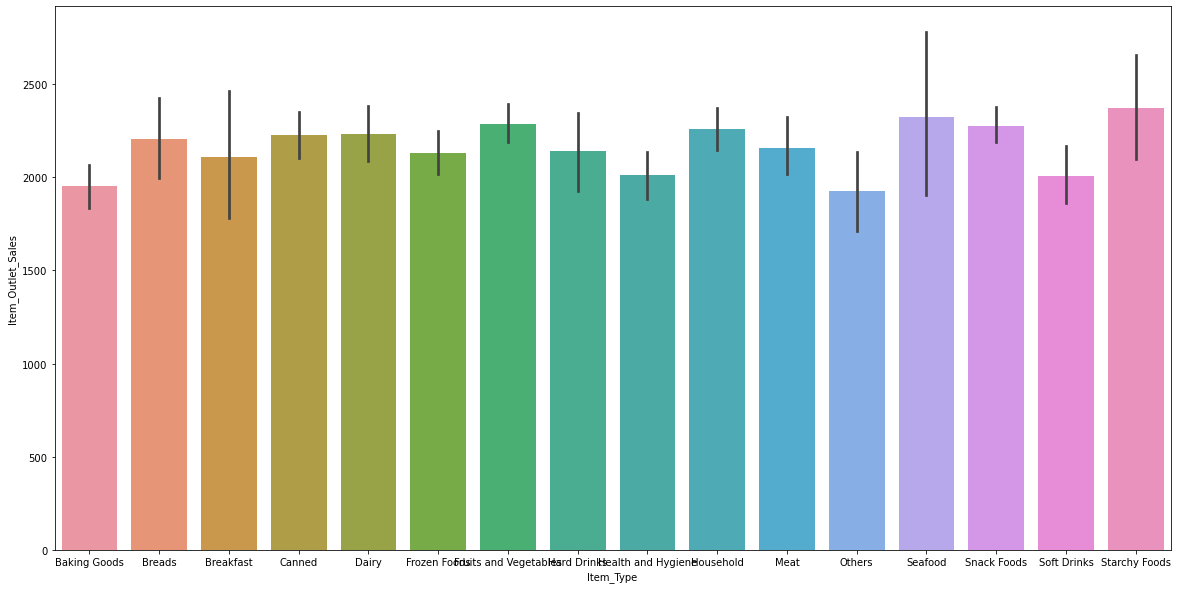

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(y=df_copy['Item_Outlet_Sales'],x=df_copy["Item_Type"])

 # more revenue from seafoods and starcgy Foods

data mining 

In [26]:
corr=df_scaled.corr()

In [27]:
corr.style.background_gradient(cmap='coolwarm')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.018409,0.026172,-0.012823,0.013261
Item_Visibility,-0.018409,1.000000,-0.005861,-0.080598,-0.135247
Item_MRP,0.026172,-0.005861,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.012823,-0.080598,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.013261,-0.135247,0.567574,-0.049135,1.000000


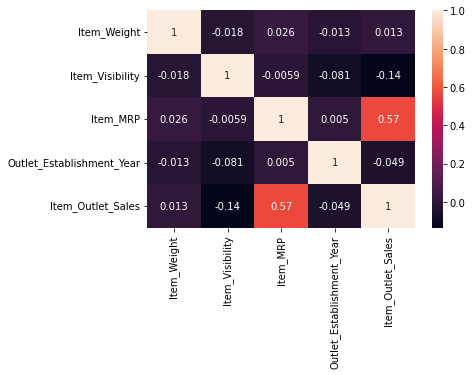

In [28]:
hm = sns.heatmap(corr, annot = True)
plt.show()

In [29]:
# Selecting Features having Correlation greater than 0.1
select = []
for i in df_scaled:
  if abs(df_scaled[i].corr(df_scaled['Item_Outlet_Sales']))>=0.1 :
    select.append(i)

In [30]:
select_final=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Location_Type']

In [31]:
df_final1=df_scaled[select]

In [32]:
df_final2=df2[select_final]

In [33]:
model_df=pd.concat([df_final1,df_final2],axis=1,join='inner')

In [34]:
model_df

,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Location_Type
0,0.038399,0.927507,0.283587,0,4,9,1,0,0
1,0.048346,0.072068,0.031419,1,14,3,1,2,2
2,0.040593,0.468288,0.158115,0,10,9,1,0,0
3,0.218055,0.640093,0.053555,1,6,0,1,2,2
4,0.186950,0.095805,0.073651,0,9,1,0,2,2
...,...,...,...,...,...,...,...,...,...
8518,0.163812,0.777729,0.210293,0,13,1,0,2,2
8519,0.133638,0.326263,0.039529,1,0,7,2,1,1
8520,0.097321,0.228492,0.088850,0,8,6,2,1,1
8521,0.436080,0.304939,0.138835,1,13,3,1,2,2


spliting the data into train and test

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x=model_df.drop(["Item_Outlet_Sales"],axis=1)
y=model_df["Item_Outlet_Sales"]

In [37]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [38]:
print("Shape of new dataframes - {} , {}".format(X_train.shape, X_test.shape))

Shape of new dataframes - (5966, 8) , (2557, 8)


# linerRegression

In [39]:
model1 = LinearRegression().fit(X_train, y_train)
r2=model1.score(X_train, y_train)

print('Coefficient of determination:', r2)
print('Intercept:', model1.intercept_)
print('Slope:', model1.coef_)

Coefficient of determination: 0.4417440084738392
Intercept: -0.1185382306187272
Slope: [-6.84003810e-02  2.81590800e-01  6.12556352e-03  1.54559647e-05
  2.00075574e-02 -8.59340251e-04  3.18297954e-02  3.18297954e-02]


In [40]:
pred=model1.predict(X_test)

In [41]:
d=pd.DataFrame(pred,y_test)

In [42]:
MSE = mean_squared_error(y_test,pred, squared=False)
RMSE=np.sqrt(MSE)

In [43]:
print("MSE OF THE MODEL IS ",MSE)
print("RMSE OF THE MODEL IS ",RMSE)

MSE OF THE MODEL IS  0.0964521652450537
RMSE OF THE MODEL IS  0.31056748903427367


In [67]:
features=x.columns

<AxesSubplot:>

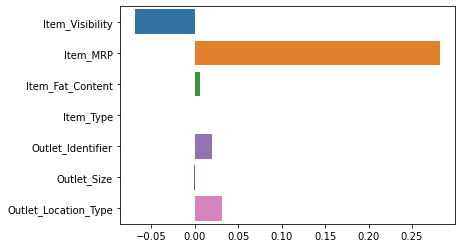

In [68]:
sns.barplot(model1.coef_,features)

# there are the important features for model based on the target
* item_mrp
* item_visibility
* outlet_loation_type

# TRYING WITH RANDOM FOREST ALGORITHM

In [44]:
from sklearn.ensemble import RandomForestRegressor    
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [45]:


regressor =RandomForestRegressor(n_estimators=10, random_state=1)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=1)

In [46]:
rf_pred=regressor.predict(X_test)

In [47]:
rf=pd.DataFrame({"X_test":y_test,"RF_pred":rf_pred})

In [48]:
MSE_rf= mean_squared_error(y_test,rf_pred, squared=False)
rmse_rf=np.sqrt(MSE_rf)

In [49]:
print("MSE of the random_forest",MSE_rf)
print("RMSE of the random_forest",rmse_rf)

MSE of the random_forest 0.09165014552622823
RMSE of the random_forest 0.3027377504148239


 # Using DecisionTree

In [50]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
Decision_regressor = DecisionTreeRegressor(random_state = 0) 
  
Decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [51]:
dt_pred = Decision_regressor.predict(X_test)

In [52]:
MSE_dt= mean_squared_error(y_test,dt_pred, squared=False)
RMSE_dt=np.sqrt(MSE_dt)

In [53]:
print("MSE OF DECISION TREE IS ",MSE_dt)
print("RMSE OF DECISION TREE IS ",RMSE_dt)

MSE OF DECISION TREE IS  0.12019071032184946
RMSE OF DECISION TREE IS  0.3466853188726766


In [54]:
from sklearn.ensemble import AdaBoostRegressor 

In [55]:
adc=AdaBoostRegressor() 
adc.fit(X_train, y_train)

AdaBoostRegressor()

In [56]:
adc_pred = adc.predict(X_test)

In [57]:
MSE_adc= mean_squared_error(y_test,adc_pred, squared=False)
RMSE_adc=np.sqrt(MSE_adc)
print("MSE OF DECISION TREE IS ",MSE_adc)
print("MSE OF DECISION TREE IS ",RMSE_adc)

MSE OF DECISION TREE IS  0.09940307036280724
MSE OF DECISION TREE IS  0.31528252467082163


In [58]:
model_list=["linerRegression","RANDOM FOREST","DecisionTree","AdaboostRegressor"]
MSE=[0.0987,0.0915,0.1240,0.1070]
RMSE=[0.3134,0.3047,0.3475,0.3271]

In [59]:
pd.DataFrame({"model_name":model_list,"MSE":MSE,"RMSE":RMSE})

,model_name,MSE,RMSE
0,linerRegression,0.0987,0.3134
1,RANDOM FOREST,0.0915,0.3047
2,DecisionTree,0.1240,0.3475
3,AdaboostRegressor,0.1070,0.3271


# less error from Random Forest so it  is the best model

In [60]:
def rev_min_max_func(scaled_val):
    max_val = max(df['Item_Outlet_Sales'])
    min_val = min(df['Item_Outlet_Sales'])
    og_val = (scaled_val*(max_val - min_val)) + min_val
    return og_val
#df['pred_target'] = scaled_labeled_df['pred_scaled_target'].apply(lambda x: rev_min_max_func(x))

In [61]:
prddd=rev_min_max_func(rf_pred)

In [62]:
act=rev_min_max_func(y_test)

In [63]:
pd.DataFrame({"Actual_value":act,"model_predicted":prddd})

,Actual_value,model_predicted
505,407.4696,450.41370
4406,421.4514,2179.69604
1193,1571.2880,2284.89244
8108,1731.0800,1829.28550
3657,2739.1012,2464.85818
...,...,...
978,762.3410,355.87010
3949,237.6906,437.49718
249,5259.8200,2800.28822
3253,1231.7300,2357.53122


In [64]:
#df_test=pd.isnull(df["Item_Outlet_Sales"]) missing values from the data we can predict this from the model also 
#test=df[df_test]